In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# load train set
df = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")

In [4]:
# First view of the train set
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [5]:
df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [6]:
df.shape

(64376, 13)

In [7]:
#filtering out the Apple golden delicious
apples_df_filter = df[df['Commodities']== 'APPLE GOLDEN DELICIOUS']
apples_df = apples_df_filter.copy()
apples_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [8]:
#shape of the new train data
apples_df.shape

(1952, 13)

In [9]:
#descriptive statistics summary
apples_df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [10]:
#summary of avg_price_per_kg
apples_df['avg_price_per_kg'].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

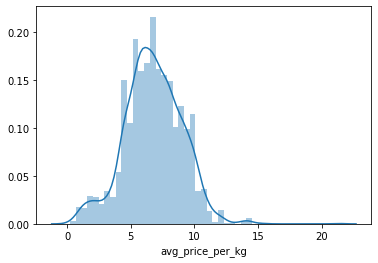

In [11]:
#histogram
sns.distplot(apples_df['avg_price_per_kg'])
#or use the ff code
# sns.displot(apples_df['avg_price_per_kg'])

This above histogram:
**- Deviate from the normal distribution**
**- slightly positive skewness almost normal **
**- showed peakness **

In [12]:
#skewness and kurtosis
print("Skewness: %f" % apples_df['avg_price_per_kg'].skew())
print("Kurtosis: %f" % apples_df['avg_price_per_kg'].kurt())

Skewness: 0.082452
Kurtosis: 1.042921


The avg_price_per_kg with a skewness of approx. 0.082 indicates moderate positive skew. The Kurtosis is low < 3 therefore means there is lack of outliers with this variable.




### Relationship of avg_price_per_kg with numerical variables



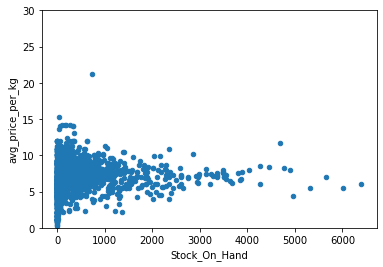

In [13]:
#scatter plot Stock_On_Hand/avg_price_per_kg
var = 'Stock_On_Hand'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

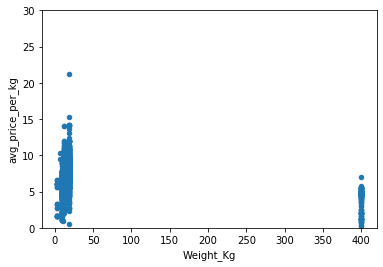

In [14]:
#scatter Weight_Kg/avg_price_per_kg
var = 'Weight_Kg'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

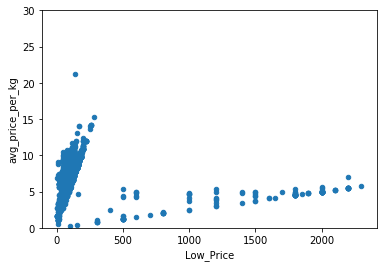

In [15]:
#scatter plot Low_Price/avg_price_per_kg
var = 'Low_Price'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

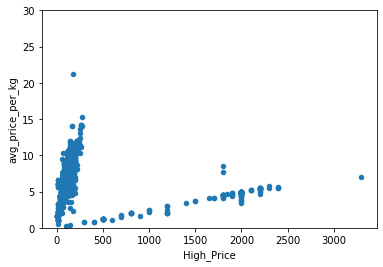

In [16]:
#scatter plot High_Price/avg_price_per_kg
var = 'High_Price'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

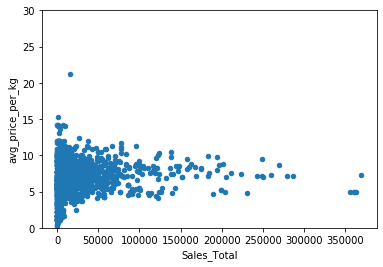

In [17]:
#scatter plot Sales_Total/avg_price_per_kg
var = 'Sales_Total'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

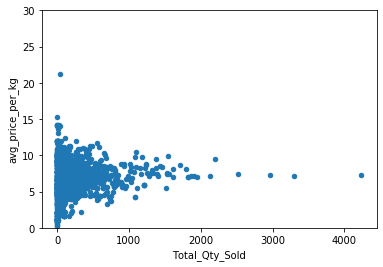

In [18]:
#scatter plot Total_Qty_Sold/avg_price_per_kg
var = 'Total_Qty_Sold'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

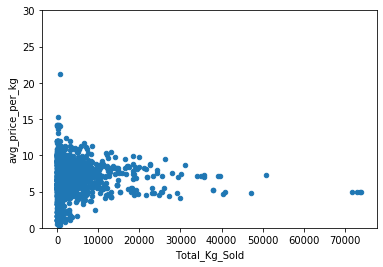

In [19]:
#scatter plot Total_Kg_Sold/avg_price_per_kg
var = 'Total_Kg_Sold'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

#### Analysis using sweetviz


In [20]:
#import sweetviz as sv
#analyze_report = sv.analyze(apples_df)
#analyze_report.show_html('analyze.html', open_browser = False)

In [21]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test

In [22]:
#compare_report = sv.compare([x_train, 'Train'], [x_test, 'Test'])
#compare_rep

### Relationship of avg_price_per_kg with categorical features


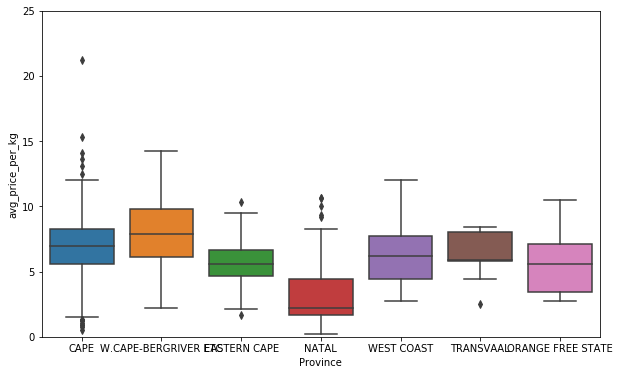

In [23]:
#box plot Province/avg_price_per_kg
var = 'Province'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

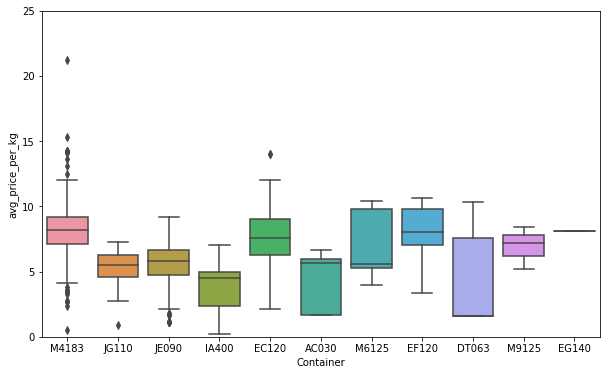

In [24]:
#box plot container/avg_price_per_kg
var = 'Container'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

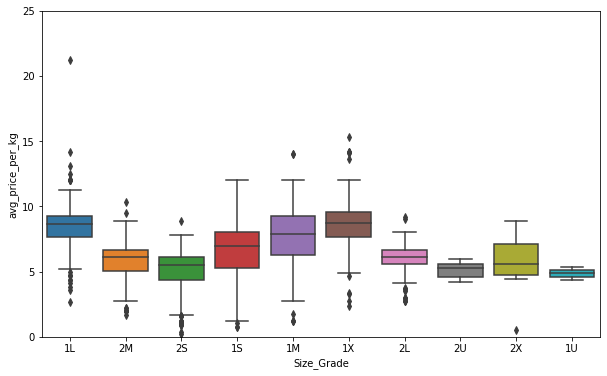

In [25]:
#box plot Size_Grade/avg_price_per_kg
var = 'Size_Grade'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

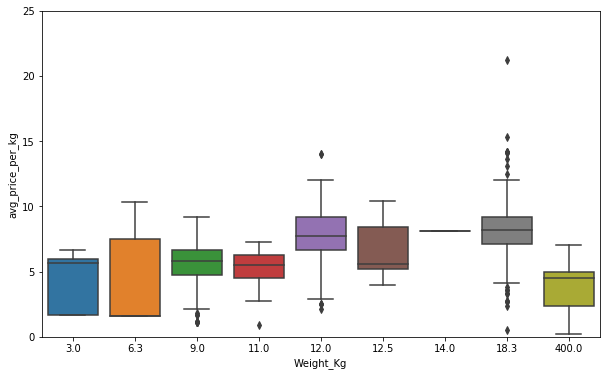

In [26]:
#box plot weight/avg_price_per_kg
var = 'Weight_Kg'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

## Multiple variable analysis


In [27]:
apples_df.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


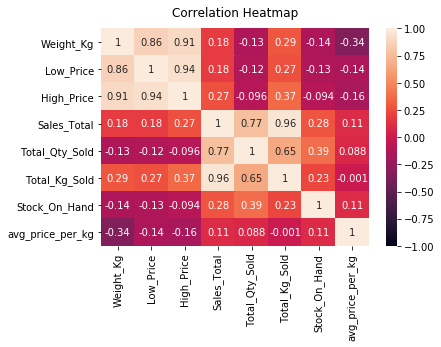

In [28]:
#correlation matrix
heatmap = sns.heatmap(apples_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**According to the heatmap above**
- Sales_Total, Total_Qty_Sold, Stock_on_hand have weak positive correlation with avg_price_per_kg.
- Weight_Kg , Low_price, High_price and Total_kg_Sold have weak negative correlation with avg_price_per_kg.

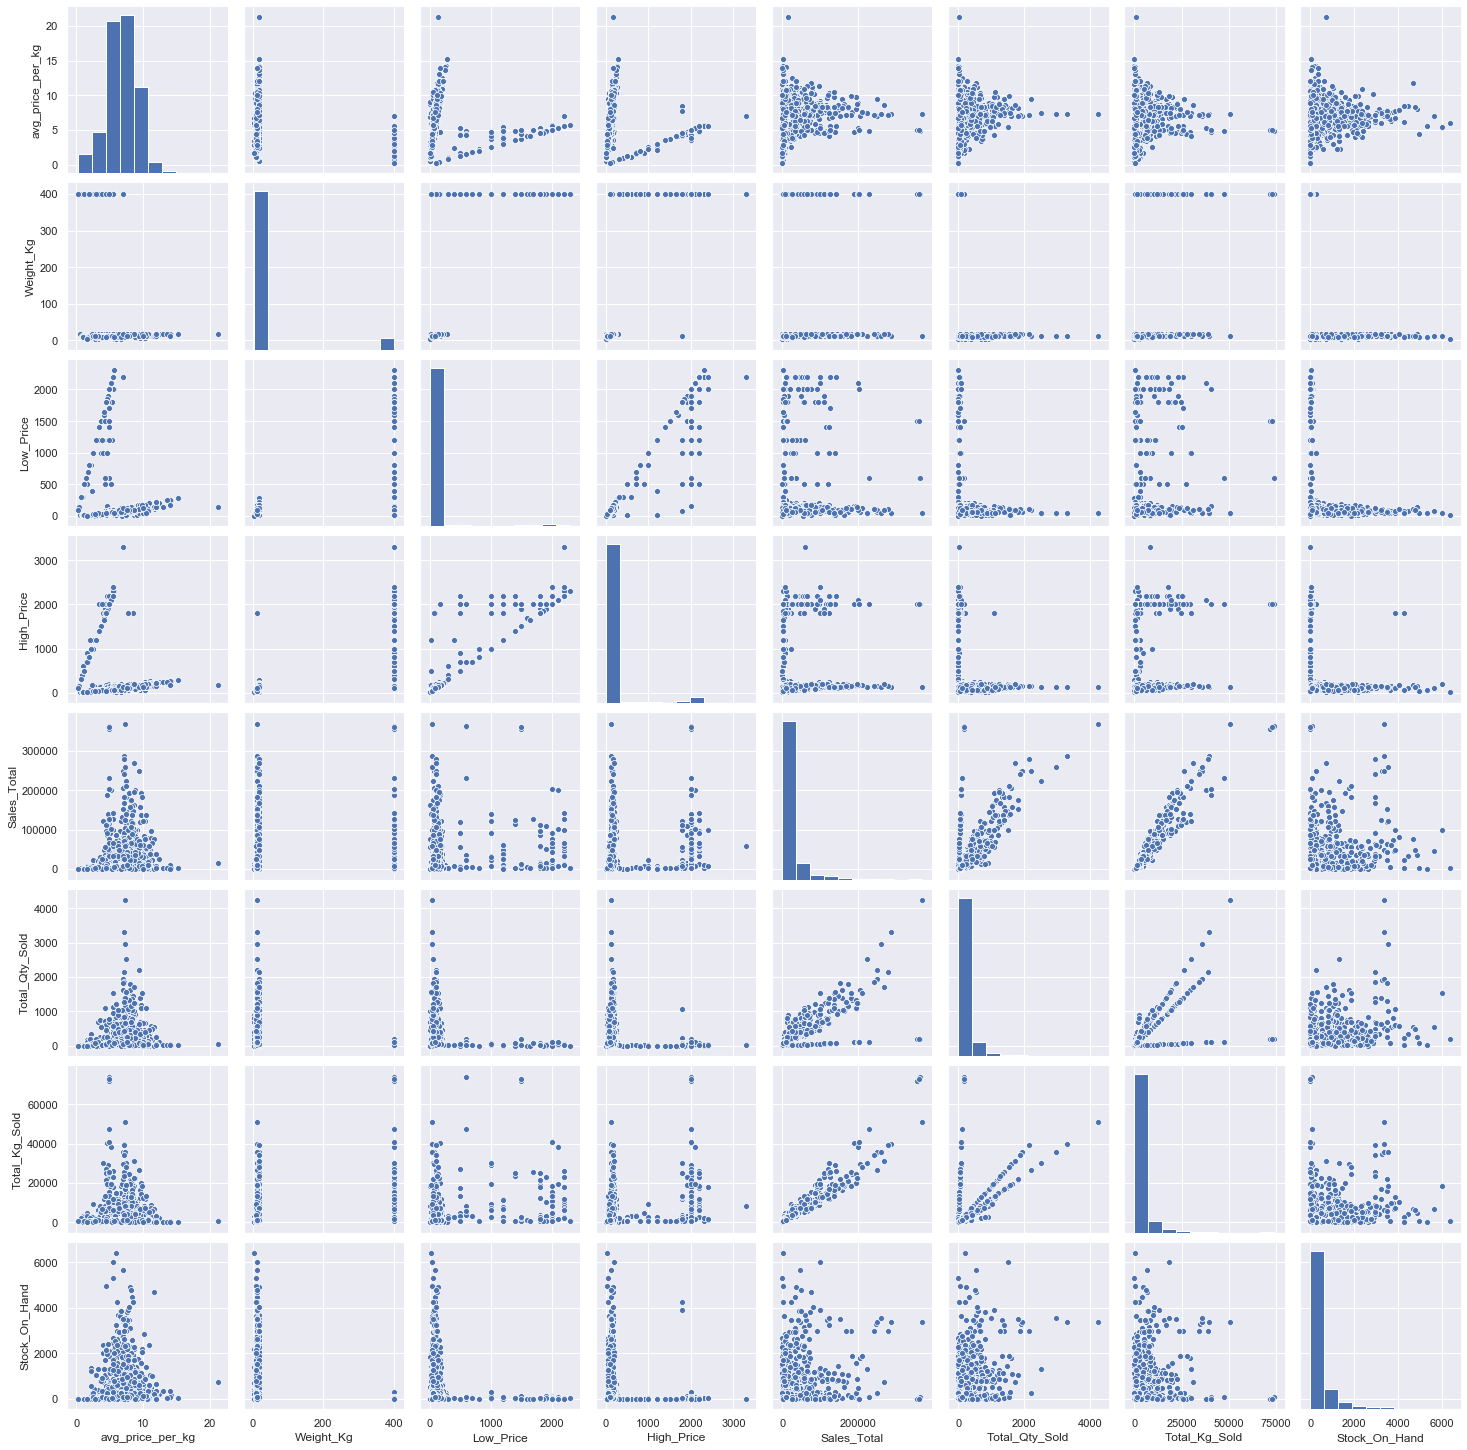

In [29]:
#scatterplot
sns.set()
cols = ['avg_price_per_kg', 'Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']
sns.pairplot(apples_df[cols], height = 2.5)
plt.show();

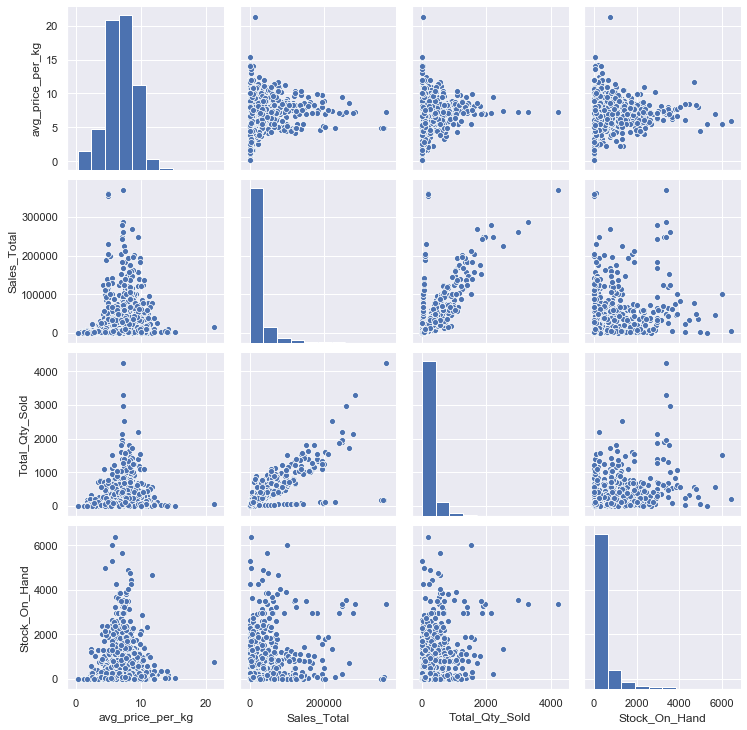

In [30]:
# positive correlation
sns.set()
cols = ['avg_price_per_kg', 'Sales_Total', 'Total_Qty_Sold', 'Stock_On_Hand']
sns.pairplot(apples_df[cols], height = 2.5)
plt.show();

**Standardising data to check for outliers **

In [31]:
#standardizing data
avg_price_perkg_scaled = StandardScaler().fit_transform(apples_df['avg_price_per_kg'][:,np.newaxis]);
low_range = avg_price_perkg_scaled[avg_price_perkg_scaled[:,0].argsort()][:10]
high_range= avg_price_perkg_scaled[avg_price_perkg_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.90409459]
 [-2.84626974]
 [-2.77065263]
 [-2.68169132]
 [-2.68169132]
 [-2.62386646]
 [-2.62386646]
 [-2.61052227]
 [-2.55714548]
 [-2.52156096]]

outer range (high) of the distribution:
[[3.0607613 ]
 [3.21199552]
 [3.21199552]
 [3.25647618]
 [3.3054049 ]
 [3.3054049 ]
 [3.3054049 ]
 [3.3054049 ]
 [3.79024404]
 [6.43239497]]


What does this mean?
 - Low range values are the same and not too far from 0
 - High range values are also similar but the 6.43239497 is far apart  and far from zero 
 - a possible outlier is 6.43239497

Drop outliers

In [32]:
# Caluclulate The Q1 and Q3
q1_weight, q3_weight  = apples_df['Weight_Kg'].quantile(0.25), apples_df['Weight_Kg'].quantile(0.75)
q1_low_price, q3_low_price = apples_df['Low_Price'].quantile(0.25), apples_df['Low_Price'].quantile(0.75)
q1_high_price, q3_high_price = apples_df['High_Price'].quantile(0.25), apples_df['High_Price'].quantile(0.75)  
q1_sales, q3_sales = apples_df['Sales_Total'].quantile(0.25), apples_df['Sales_Total'].quantile(0.75)
q1_total_kg, q3_total_kg = apples_df['Total_Kg_Sold'].quantile(0.25), apples_df['Total_Kg_Sold'].quantile(0.75)
q1_stock, q3_stock = apples_df['Stock_On_Hand'].quantile(0.25), apples_df['Stock_On_Hand'].quantile(0.75)
q1_avg, q3_avg = apples_df['avg_price_per_kg'].quantile(0.25), apples_df['avg_price_per_kg'].quantile(0.75)

In [33]:
#Calculating The Inter Quantile Range(IQR)
IQR_weight  = q1_weight - q3_weight
IQR_low_price = q1_low_price - q3_low_price
IQR_high_price = q1_high_price - q3_high_price 
IQR_sales = q1_sales - q3_sales
IQR_total_kg = q1_total_kg - q3_total_kg
IQR_stock = q1_stock - q3_stock
IQR_avg = q1_avg - q3_avg

In [34]:
#calculate The Lower and Upper Limits 
lower_limit_weight, upper_limit_weight = q1_weight - 1.5*IQR_weight, q3_weight + 1.5*IQR_weight
lower_limit_low_price, upper_limit_low_price = q1_low_price - 1.5*IQR_low_price, q3_low_price +1.5*IQR_low_price
lower_limit_high_price, upper_limit_high_price = q1_high_price - 1.5*IQR_high_price, q3_high_price+1.5*IQR_high_price 
lower_limit_sales, upper_limit_sales = q1_sales - 1.5*IQR_sales, q3_sales + 1.5*IQR_sales
lower_limit_total_kg, upper_limit_total_kg = q1_total_kg -1.5*IQR_total_kg, q3_total_kg + 1.5*IQR_total_kg
lower_limit_stock, upper_limit_stock = q1_stock - 1.5*IQR_stock, q3_stock + 1.5*IQR_stock
lower_limit_avg, upper_limit_avg = q1_avg - 1.5*IQR_avg, q3_avg + 1.5*IQR_avg

In [35]:
#Replace the outliers with the mean
apples_df['Weight_Kg'] = np.where(apples_df['Weight_Kg'] > upper_limit_weight,np.mean(apples_df['Weight_Kg']),apples_df['Weight_Kg'])
apples_df['Low_Price'] = np.where(apples_df['Low_Price'] > upper_limit_low_price,np.mean(apples_df['Low_Price']), apples_df['Low_Price'])
apples_df['High_Price'] = np.where(apples_df['High_Price'] > upper_limit_high_price,np.mean(apples_df['High_Price']), apples_df['High_Price'])
apples_df['Sales_Total'] = np.where(apples_df['Sales_Total'] > upper_limit_sales,np.mean(apples_df['Sales_Total']), apples_df['Sales_Total'])
apples_df['Total_Kg_Sold'] = np.where(apples_df['Total_Kg_Sold'] > upper_limit_total_kg,np.mean(apples_df['Total_Kg_Sold']), apples_df['Total_Kg_Sold'])
apples_df['Stock_On_Hand'] = np.where(apples_df['Stock_On_Hand'] > upper_limit_stock,np.mean(apples_df['Stock_On_Hand']), apples_df['Stock_On_Hand'])
apples_df['avg_price_per_kg'] = np.where(apples_df['avg_price_per_kg'] > upper_limit_avg,np.mean(apples_df['avg_price_per_kg']), apples_df['avg_price_per_kg'])

In [36]:
apples_df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1.952000e+03,1952.000000,1.952000e+03,1.952000e+03,1952.000000
mean,39.865990,171.161694,212.464425,2.005353e+04,174.510758,2.960176e+03,4.083940e+02,6.404847
std,4.684404,22.639246,25.490398,2.183347e-11,308.810797,7.778172e-11,9.154136e-12,1.236649
min,3.000000,2.000000,5.000000,2.005353e+04,1.000000,2.960176e+03,4.083940e+02,0.250000
25%,40.460912,174.307377,215.648053,2.005353e+04,12.000000,2.960176e+03,4.083940e+02,6.778893
50%,40.460912,174.307377,215.648053,2.005353e+04,64.000000,2.960176e+03,4.083940e+02,6.778893
75%,40.460912,174.307377,215.648053,2.005353e+04,200.000000,2.960176e+03,4.083940e+02,6.778893
max,40.460912,174.307377,215.648053,2.005353e+04,4237.000000,2.960176e+03,4.083940e+02,6.778893


### Normality

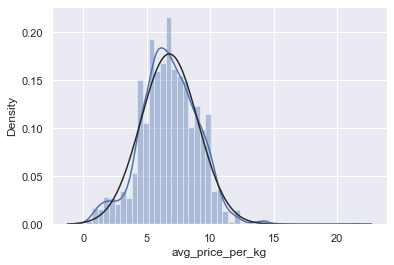

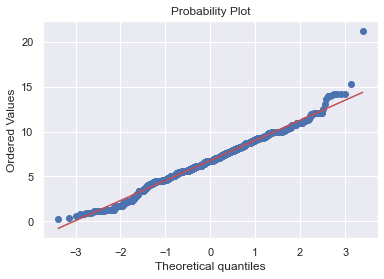

In [86]:
#histogram and normal probability plot

sns.distplot(apples_df['avg_price_per_kg'], fit=norm);
figure = plt.figure()
prob_plot = stats.probplot(apples_df['avg_price_per_kg'], plot=plt)

avg_price_per_kg is almost normal but not normal and shows some peakness, a slightly positive  skewness

### Dummy variables

In [104]:
#convert categorical variable into dummy

#apples_dummies = pd.get_dummies(apples_df)
#apples_dummies

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,Province_EASTERN CAPE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,1,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,1,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,1,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,12.0,96.0,96.0,1920.0,20,240.0,53,8.00,0,0,...,0,0,0,0,0,0,0,0,0,0
64291,18.3,130.0,130.0,7280.0,56,1024.8,74,7.10,0,0,...,0,0,0,0,0,0,0,0,0,0
64297,9.0,50.0,60.0,4540.0,89,801.0,793,5.67,1,0,...,0,0,0,0,0,0,0,0,0,0
64304,11.0,30.0,40.0,2140.0,70,770.0,0,2.78,1,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
apples_df.drop(['Commodities', 'Date'], axis=1)

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,96.0,96.0,1920.0,20,240.0,53,8.00
64291,ORANGE FREE STATE,M4183,1X,18.3,130.0,130.0,7280.0,56,1024.8,74,7.10
64297,CAPE,JE090,2M,9.0,50.0,60.0,4540.0,89,801.0,793,5.67
64304,CAPE,JG110,2M,11.0,30.0,40.0,2140.0,70,770.0,0,2.78


In [186]:
cat_columns = ['Weight_Kg', 'Size_Grade', 'Container', 'Province']

In [187]:
def category_multcols(allcolumns):
    df_final = final_df
    i=0
    for fields in allcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [188]:
main_df = apples_df.copy()

In [189]:
## Combine Test Data 

test_df = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv')

In [190]:
test_df.shape

(685, 13)

In [191]:
final_df = pd.concat([apples_df,test_df],axis=0)

In [192]:
final_df['avg_price_per_kg']

1      8.51
7      4.55
24     6.11
40     4.51
69     4.50
       ... 
680     NaN
681     NaN
682     NaN
683     NaN
684     NaN
Name: avg_price_per_kg, Length: 2637, dtype: float64

In [193]:
final_df.shape

(2637, 14)

In [194]:
final_df = category_multcols(cat_columns)

Weight_Kg
Size_Grade
Container
Province


In [195]:
final_df.shape

(2637, 43)

In [196]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [197]:
final_df.shape

(2637, 43)

In [170]:
final_df

,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Index,6.3,9.0,...,JG110,M4183,M6125,M9125,EASTERN CAPE,NATAL,ORANGE FREE STATE,TRANSVAAL,W.CAPE-BERGRIVER ETC,WEST COAST
1,150.0,170.0,51710.0,332,6075.6,822,8.51,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
7,50.0,50.0,16000.0,320,3520.0,0,4.55,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
24,55.0,55.0,990.0,18,162.0,1506,6.11,NaN,0,1,...,0,0,0,0,0,0,0,0,1,0
40,80.0,120.0,32020.0,388,7100.4,443,4.51,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
69,1800.0,1800.0,1800.0,1,400.0,2,4.50,NaN,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,30.0,30.0,1320.0,44,396.0,856,NaN,681.0,0,1,...,0,0,0,0,0,0,0,0,1,0
681,50.0,132.0,6290.0,52,624.0,785,NaN,682.0,0,0,...,0,0,0,0,0,0,0,0,0,0
682,55.0,55.0,220.0,4,36.0,170,NaN,683.0,0,1,...,0,0,0,0,0,0,0,0,1,0
683,120.0,150.0,27840.0,202,3696.6,0,NaN,684.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [198]:
df_Train=final_df.iloc[:1320,:]
df_Test=final_df.iloc[1320:,:]

In [199]:
df_Train.head()

,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Index,...,JG110,M4183,M6125,M9125,EASTERN CAPE,NATAL,ORANGE FREE STATE,TRANSVAAL,W.CAPE-BERGRIVER ETC,WEST COAST
1,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,NaN,...,0,1,0,0,0,0,0,0,0,0
7,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,NaN,...,1,0,0,0,0,0,0,0,0,0
24,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,NaN,...,0,0,0,0,0,0,0,0,1,0
40,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,NaN,...,0,1,0,0,0,0,0,0,0,0
69,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,NaN,...,0,0,0,0,1,0,0,0,0,0


In [154]:
df_Test.head()

,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Index,...,JG110,M4183,M6125,M9125,EASTERN CAPE,NATAL,ORANGE FREE STATE,TRANSVAAL,W.CAPE-BERGRIVER ETC,WEST COAST
49832,APPLE GOLDEN DELICIOUS,2020-08-05,17.0,17.0,1700.0,100,300.0,299,5.67,NaN,...,0,0,0,0,0,0,0,0,0,0
49853,APPLE GOLDEN DELICIOUS,2020-08-11,60.0,60.0,1380.0,23,207.0,53,6.67,NaN,...,0,0,0,0,0,0,0,0,0,0
49876,APPLE GOLDEN DELICIOUS,2020-06-27,50.0,50.0,50.0,1,9.0,0,5.56,NaN,...,0,0,0,0,1,0,0,0,0,0
49892,APPLE GOLDEN DELICIOUS,2019-12-12,190.0,200.0,4200.0,22,402.6,1380,10.43,NaN,...,0,1,0,0,0,0,0,0,0,0
49937,APPLE GOLDEN DELICIOUS,2020-02-12,70.0,80.0,61900.0,880,9680.0,138,6.39,NaN,...,1,0,0,0,0,0,0,0,0,0


In [176]:
df_Test.drop(['avg_price_per_kg'],axis=1,inplace=True)

In [177]:
X_train=df_Train.drop(['avg_price_per_kg'],axis=1)
y_train=df_Train['avg_price_per_kg']

### Prediciton and selecting the Algorithm

In [178]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [179]:
import xgboost
classifier=xgboost.XGBRegressor()

In [180]:
regressor=xgboost.XGBRegressor()

In [181]:
booster=['gbtree','gblinear']

base_score=[0.25,0.5,0.75,1]

In [182]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [183]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [184]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 182 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    3.9s finished


ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Commodities, Date